In [27]:
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt
import upsetplot
from upsetplot import from_contents
import glob
import collections
import seaborn as sns
import matplotlib.ticker as ticker
import tarfile


In [6]:
# sample = 'TCGA-AO-A0JM-01A-21R-A056-07'
# background = 'matchedNormals'

In [7]:
path_data = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{}.all/commit_6e25db6_{}'.format(sample, background)

NameError: name 'sample' is not defined

In [8]:
#all_paths = glob.glob(path_data + '/G_*tsv')

In [9]:
#all_paths = [path for path in all_paths if 'Uniprot' in path ]

In [10]:
#len(np.unique(all_paths))

In [11]:
plot_dir = '/cluster/work/grlab/projects/projects2020_OHSU/plots'
plot_dir = os.path.join(plot_dir, 'upset_plots')
os.mkdir(plot_dir)


NameError: name 'sample' is not defined

# Helpers



In [12]:
def ohsu_to_eth(path):
    cohort = {'NormalCohortcore_GTEx_': 'Gtexcore', 
             'NormalCohortpaired_': 'Matched', 
             'NormalCohortAll_':'Alls'}
    
    key_to_apply = [k for k in cohort if k in path]
    if key_to_apply: 
        key_to_apply = key_to_apply[0]
        path = path.replace(key_to_apply, '')
        path = path.replace('FiltNormalsC','FiltNormals{}C'.format(cohort[key_to_apply]) )

        path = path.replace('J_', 'G_')

        path = path.replace('CohortLim', '.0CohortLim')
        sample = path.split('_')[1]
        #print(path)
        return path, sample
    else:
        return None, None 

In [13]:
def get_eth_path(base_folder_ETH, name_eth=None, sample=None):
    path_o = None 
    if name_eth is not None: 
        path_list = os.path.join(base_folder_ETH, 'filter_' + sample, '*', name_eth, 'part*')
        path_list = glob.glob(path_list)
        if path_list:
            path_o = path_list[0]
    return path_o 
    

In [14]:
def get_file_pairs(tar_file_OHSU, base_folder_ETH):
    file_pair = {'eth':[], 'ohsu': []}
    with tarfile.open(tar_file_OHSU, "r:*") as tar:
        file_names_OHSU = tar.getnames()

        for name_ohsu in file_names_OHSU:
            name_eth, sample = ohsu_to_eth(name_ohsu)
            eth_path = get_eth_path(base_folder_ETH, name_eth, sample)
            if (eth_path is not None) and os.path.isfile(eth_path):
                file_pair['eth'].append(eth_path) 
                file_pair['ohsu'].append(name_ohsu)
    return file_pair

# Main Data

In [15]:
tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/Aug21_graph_data_current/OHSU_kmer_lists_Nov24.tar.gz'
base_folder_ETH = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102'


In [16]:
file_pair = get_file_pairs(tar_file_OHSU, base_folder_ETH)

In [17]:
sample = 'TCGA-AO-A0JM-01A-21R-A056-07'
background = 'matchedNormals'

In [18]:
valid_idx = [idx for  idx, eth in enumerate(file_pair['eth'])  if (sample in eth) and (background in eth)]
len(valid_idx)

48

In [19]:
simple_content = {}
with tarfile.open(tar_file_OHSU, "r:*") as tar:
    for idx in valid_idx:
        print('processing {}'.format(idx))
        df_eth = pd.read_csv(file_pair['eth'][idx], sep="\t", usecols = ['kmer'])['kmer'].tolist()
        df_ohsu = pd.read_csv(tar.extractfile(file_pair['ohsu'][idx]), sep="\t", usecols = ['kmer'])['kmer'].tolist()
        label_eth = file_pair['eth'][idx].split('/')[-2]
        label_ohsu = file_pair['ohsu'][idx]
        
        simple_content[label_ohsu] = np.unique(df_ohsu)
        simple_content[label_eth] = np.unique(df_eth)

        print('done')

processing 271
done
processing 272
done
processing 273
done
processing 274
done
processing 275
done
processing 276
done
processing 277
done
processing 278
done
processing 279
done
processing 280
done
processing 281
done
processing 282
done
processing 283
done
processing 284
done
processing 285
done
processing 286
done
processing 287
done
processing 288
done
processing 289
done
processing 290
done
processing 291
done
processing 292
done
processing 293
done
processing 294
done
processing 295
done
processing 296
done
processing 297
done
processing 298
done
processing 299
done
processing 300
done
processing 301
done
processing 302
done
processing 303
done
processing 304
done
processing 305
done
processing 306
done
processing 307
done
processing 308
done
processing 309
done
processing 310
done
processing 311
done
processing 312
done
processing 313
done
processing 314
done
processing 315
done
processing 316
done
processing 317
done
processing 318
done


# Upset Plot

In [31]:
def plot_subsets(myplot_collect, min_subset=None, save_path=None, save=False):

    myplot = from_contents(myplot_collect)

    plt.figure(figsize=(10,25))
    if min_subset:
        plotted = upsetplot.plot(myplot, sort_by='degree', min_subset_size=500)
    else: 
        plotted = upsetplot.plot(myplot, sort_by='degree')

    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight', dpi = 300)
    plt.show()
    return plotted


/cluster/work/grlab/projects/projects2020_OHSU/plots/upset_plots/v2_v2.5f0752a_conf2_BRCA_TCGA-AO-A0JM-01A-21R-A056-07_matchedNormals_Upset_G_J.png
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/upset_plots/v2_v2.5f0752a_conf2_BRCA_TCGA-AO-A0JM-01A-21R-A056-07_matchedNormals_Upset_G_J.png


<Figure size 720x1800 with 0 Axes>

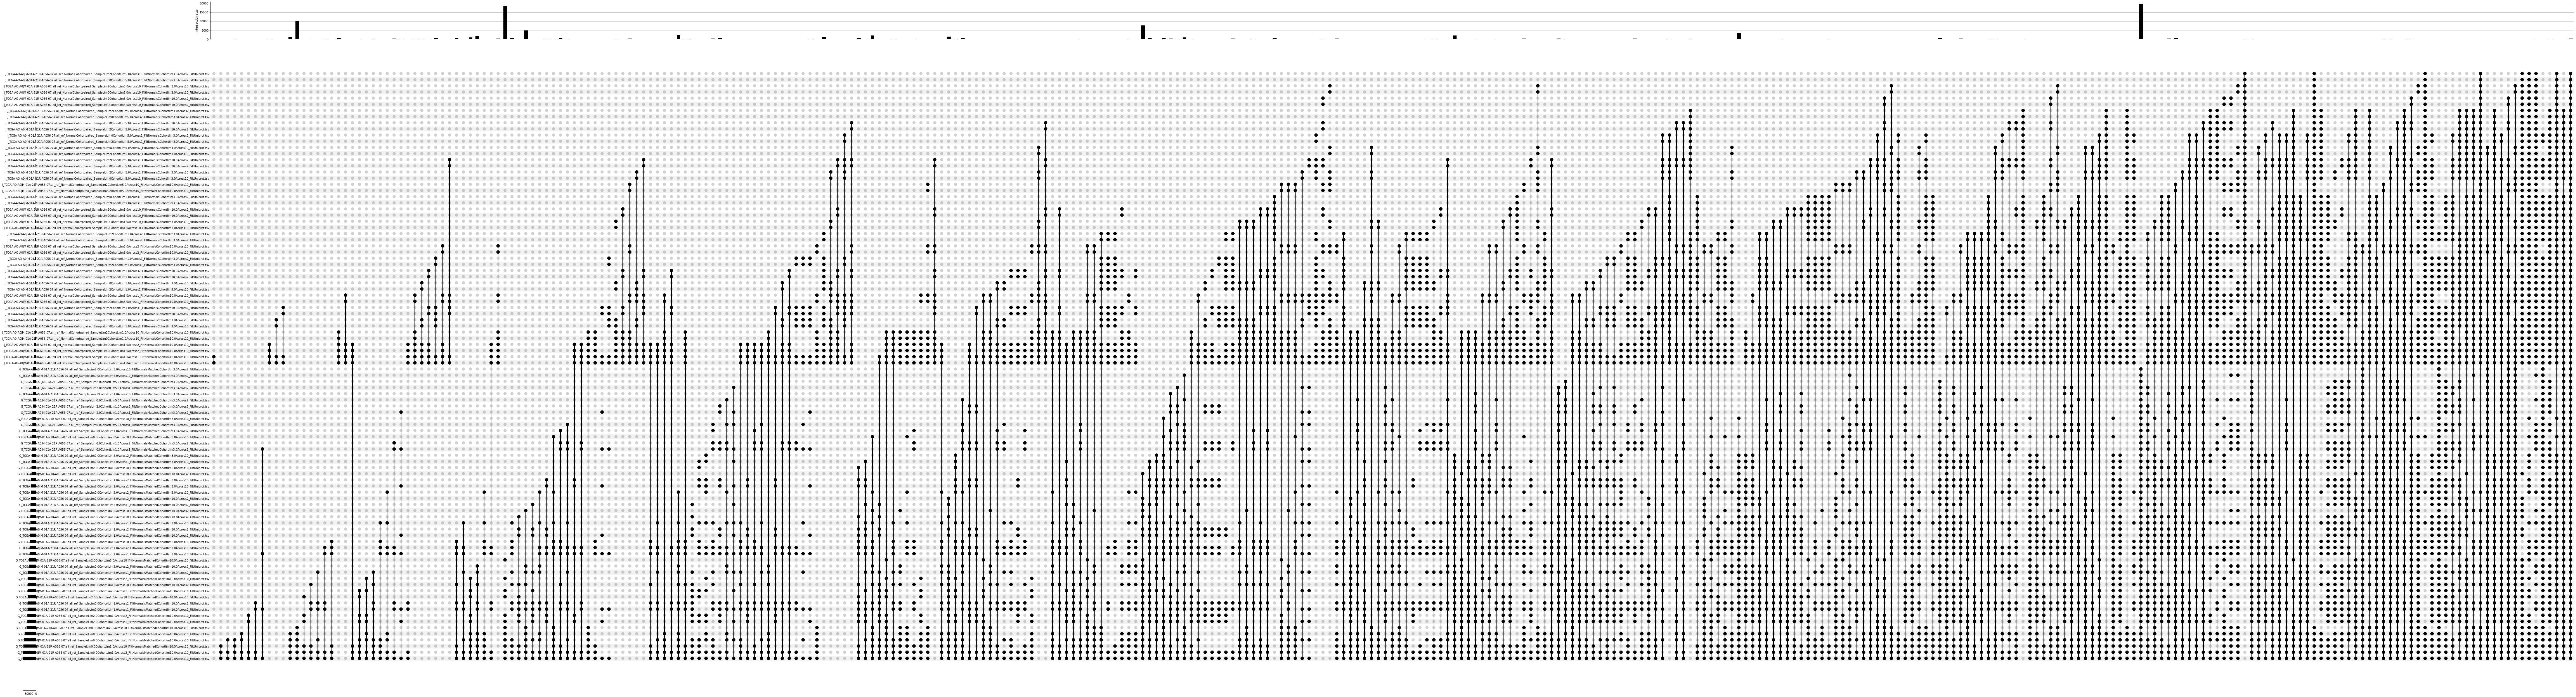

In [29]:
base_plot = 'v2_v2.5f0752a_conf2_BRCA_{}_{}'.format(sample, background)
save_path = os.path.join(plot_dir, base_plot + '_Upset' + '_G_J'+ '.png')
print(save_path)

save = True
myplot = plot_subsets(simple_content, save_path=save_path, save=save)

/cluster/work/grlab/projects/projects2020_OHSU/plots/upset_plots/v2_v2.5f0752a_conf2_BRCA_TCGA-AO-A0JM-01A-21R-A056-07_matchedNormals_Upset_lim500_G_J.png
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/upset_plots/v2_v2.5f0752a_conf2_BRCA_TCGA-AO-A0JM-01A-21R-A056-07_matchedNormals_Upset_lim500_G_J.png


<Figure size 720x1800 with 0 Axes>

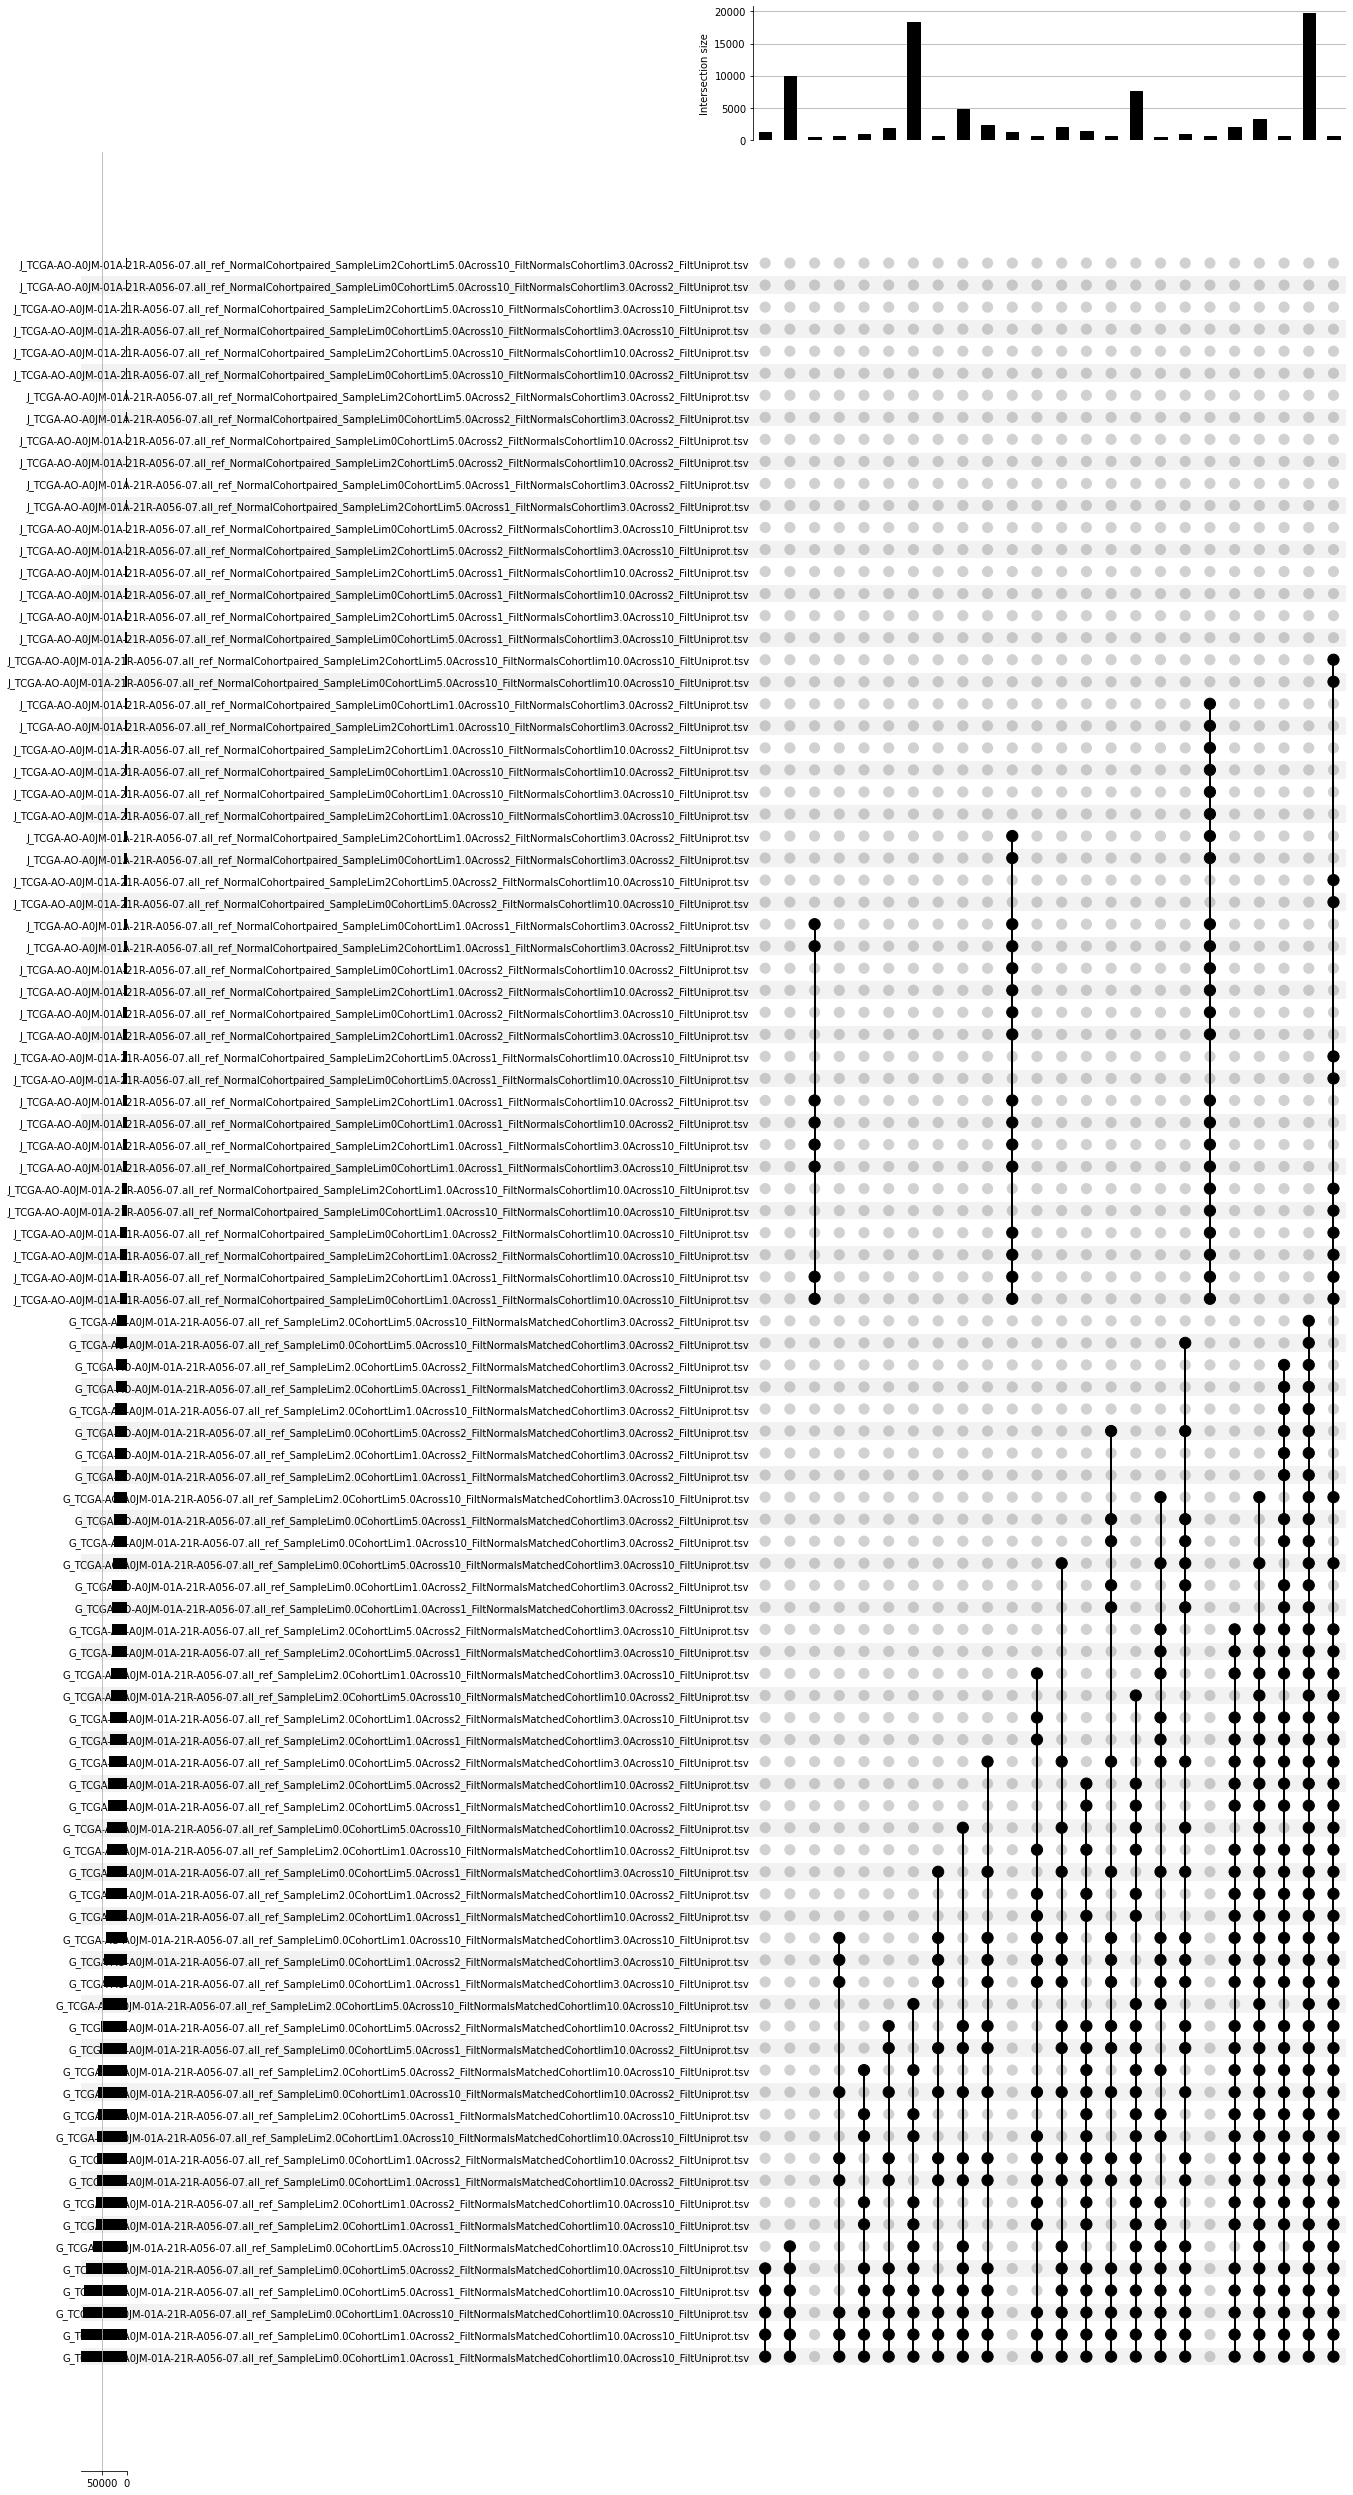

In [32]:
min_subset = 500
base_plot = 'v2_v2.5f0752a_conf2_BRCA_{}_{}'.format(sample, background)
save_path = os.path.join(plot_dir, base_plot + '_Upset_lim' + str(min_subset) + '_G_J'+ '.png')
print(save_path)

save = True
myplot = plot_subsets(simple_content, min_subset, save_path=save_path, save=save)

In [34]:
top_bottom = [text.get_text() for text in myplot['matrix'].properties()['ymajorticklabels']][::-1]

# Legend


In [40]:
def path_to_condition(all_paths):
    # None handling added 
    
    all_paths = [path.replace('None', '0') for path in all_paths]
    sample_expr = [np.float(os.path.basename(path).split('ref_SampleLim')[1].split('Cohort')[0]) 
                   for path in all_paths ]

    foreground_cohort_expr = [np.float(os.path.basename(path).split('CohortLim')[1].split('Across')[0])
                                       for path in all_paths ]

    foreground_cohort_samples = [np.int(os.path.basename(path).split('Across')[1].split('_Filt')[0] ) 
                                 for path in all_paths ]

    background_cohort_expr = [np.float(os.path.basename(path).split('Cohortlim')[1].split('Across')[0])
                              for path in all_paths ]

    background_cohort_samples = [np.int(os.path.basename(path).split('Across')[2].split('_FiltUn')[0])
                                 for path in all_paths ]
    background_cohort_id = [os.path.basename(path).split('Normals')[1].split('lim')[0] for path in all_paths ]

    legend_quant = pd.DataFrame({'sample_expr':sample_expr, 
                  'foreground_cohort_expr': foreground_cohort_expr, 
                  'foreground_cohort_samples': foreground_cohort_samples, 
                  'background_cohort_expr': background_cohort_expr,
                  'background_cohort_samples' : background_cohort_samples, 
                    'background_cohort_id':background_cohort_id})


    sort_legend = False
    if sort_legend:
        legend_quant = legend_quant.sort_values("background_cohort_samples", ascending=False).\
        sort_values("background_cohort_expr", ascending=False).\
        sort_values("foreground_cohort_samples", ascending=False).\
        sort_values("foreground_cohort_expr", ascending=False).\
        sort_values("sample_expr", ascending=False)
    return legend_quant

In [37]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


# y = legend_quant["background_cohort_samples"]
# x = legend_quant["index"]
# sns.barplot(y, x, palette=colors_from_values(y, "YlOrRd"), orient="h")

In [38]:
def plot_legend(y1, y2, y3, y4, y5, y6, x, save_path=None, save=False):
    #sns.set(style="white", context="talk")  
    sns.set_style("white")
    #, {
    #     "ytick.major.size": 0.1,
    #     "ytick.minor.size": 0.05,
    #     'grid.linestyle': '--', 
    #         "xtick.major.size": 0.1,
    #     "xtick.minor.size": 0.05,
    #     'grid.linestyle': '--'
    #  })
    rs = np.random.RandomState(8)  
    min_axes = -0.5
    y_label_size = 35
    x_label_size = 20
    # Set up the matplotlib figure  
    f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(16,10), sharey=True)  


    sns.barplot(x=y1, y=x, palette=colors_from_values(y1, "YlOrRd"), ax=ax1, orient="h")  
    #ax1.axhline(0, color="k", clip_on=True)  
    #ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax1.set_xlim([min_axes, max(y1)])
    ax1.set_ylabel(y1.name, fontsize=y_label_size) 
    ax1.tick_params(labelsize=x_label_size) 


    sns.barplot(x=y2, y=x, palette=colors_from_values(y2, "vlag"), ax=ax2, orient="h", linewidth=1)  
    #ax2.axhline(0, color="k", clip_on=False)  
    ax2.set_xlim([min_axes, max(y2)])
    ax2.set_ylabel(y2.name, fontsize=y_label_size) 
    ax2.tick_params(labelsize=x_label_size) 

    sns.barplot(x=y3, y=x, palette=colors_from_values(y3, "deep"), ax=ax3, orient="h")
    #ax3.axhline(0, color="k", clip_on=False)  
    ax3.set_xlim([min_axes, max(y3)])
    ax3.set_ylabel(y3.name, fontsize=y_label_size) 
    ax3.tick_params(labelsize=x_label_size) 
    
    sns.barplot(x=y4, y=x, palette=colors_from_values(y4, "turbo"), ax=ax4, orient="h")
    #ax4.axhline(0, color="k", clip_on=False)  
    ax4.set_xlim([min_axes, max(y4)])
    ax4.set_ylabel(y4.name, fontsize=y_label_size) 
    ax4.tick_params(labelsize=x_label_size) 
    
    sns.barplot(x=y5, y=x, palette=colors_from_values(y5, "Accent"), ax=ax5, orient="h")
    #ax5.axhline(0, color="k", clip_on=False)  
    ax5.set_xlim([min_axes, max(y5)])
    ax5.set_ylabel(y5.name, fontsize=y_label_size) 
    ax5.tick_params(labelsize=x_label_size) 
    
    sns.scatterplot(x=np.ones(len(x)), y=x, ax=ax6, hue=y6)
    #ax6.axhline(0, color="k", clip_on=False)  
    #ax.legend(ax6.get_legend(),loc='lower right' ) 
    ax6.legend(loc='center right', bbox_to_anchor=(1,0))
    #ax6.invert_yaxis()
    ax6.set_ylabel(y6.name, fontsize=y_label_size) 
    ax6.tick_params(labelsize=x_label_size, labelbottom=False) 

    # Finalize the plot  
    sns.despine(bottom=True)  
    plt.setp(ax.get_yticklabels() ,  fontsize=y_label_size, rotation=89)
    plt.setp(f.axes, yticks=np.arange(0,len(x),10), xlabel='')
    plt.tight_layout(h_pad=1) 

    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight', dpi = 300)
    plt.show()

In [39]:
legend_quant = path_to_condition(top_bottom)

IndexError: list index out of range

In [ ]:
#Prepare Plot
legend_quant.columns = [col.replace('_', ' ') for col in legend_quant.columns]
y1, y2, y3, y4, y5, y6 = [legend_quant[col] for col in legend_quant.columns]
legend_quant['index'] = np.arange(legend_quant.shape[0])
x = legend_quant['index'] 

In [ ]:
save = True
save_path = os.path.join(plot_dir, base_plot + 'legend' + '_mini' + '.png')
plot_legend(y1, y2, y3, y4, y5, y6, x, save_path, save)